# Cap Recognizer
The goal of this project is to classify 20 different types of caps / headwears commonly worn around the world. The types are following: <br/>
1. baseball cap
2. beanie cap
3. fedora cap
4. cowboy hat
5. kepi cap
6. flat cap
7. trucker cap
8. newsboy cap
9. pork pie hat
10. bowler hat
11. top hat
12. sun hat
13. boater hat
14. ivy cap
15. bucket hat
16. balaclava cap
17. turban cap
18. taqiyah cap
19. rasta cap
20. visor cap

# Setting Up Necessary Things

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8     #batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
# %cd /content/drive/My Drive/MasterCourseML/week-8/Cap Recognizer

creating zip file with data folder and save it to Cap Recognizer folder as name cap_data.zip

In [ ]:
# !zip -r '/content/drive/My Drive/MasterCourseML/week-8/Cap Recognizer/cap_data.zip' '/content/drive/My Drive/MasterCourseML/week-8/Cap Recognizer/data'

  adding: content/drive/My Drive/MasterCourseML/week-8/Cap Recognizer/data/ (stored 0%)
  adding: content/drive/My Drive/MasterCourseML/week-8/Cap Recognizer/data/baseball cap/ (stored 0%)
  adding: content/drive/My Drive/MasterCourseML/week-8/Cap Recognizer/data/baseball cap/a6b5a570-82e5-4c9a-b96a-38bf08d70c15.jpg (deflated 14%)
  adding: content/drive/My Drive/MasterCourseML/week-8/Cap Recognizer/data/baseball cap/73ec8c4c-d478-43f0-bb70-5ab4dccdc730.jpg (deflated 9%)
  adding: content/drive/My Drive/MasterCourseML/week-8/Cap Recognizer/data/baseball cap/134fe0fd-4f8d-467b-994f-71f4fba80902.jpeg (deflated 2%)
  adding: content/drive/My Drive/MasterCourseML/week-8/Cap Recognizer/data/baseball cap/5464eb04-50fc-4d50-add6-2395c2a1789f.jpg (deflated 10%)
  adding: content/drive/My Drive/MasterCourseML/week-8/Cap Recognizer/data/baseball cap/5bff8a83-bd0f-43c9-8e8d-86fad4c066a9.png (deflated 0%)
  adding: content/drive/My Drive/MasterCourseML/week-8/Cap Recognizer/data/baseball cap/fe09a

# Download Images from Browser

You can download images from Google Image Search and Bing Image Search. You can try it out in your own time. You might need to build a scraper or use their API. <br/>

For ease, we are going to use **DuckDuckGo Image Search**. <br/>

**Good news!** Fastai has a function to do this for us.

To use DuckDuckGo to download images, use the search_images_ddg function from

---

fastbook:

In [ ]:
urls = search_images_ddg('grizzly bear', max_images=100)     # we can replace the name grizzly bear by any search term
len(urls)

100

In [ ]:
urls[0]

'https://www.expeditionsalaska.com/wp-content/uploads/2017/04/16-brown-bear-photos-2377.jpg'

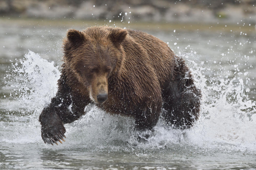

In [ ]:
download_url(urls[0], 'image/bear.jpg')
im = Image.open('image/bear.jpg')
im.thumbnail((256,256))
im

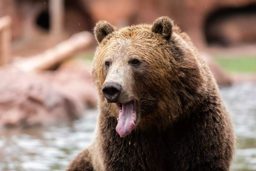

In [ ]:
download_url(urls[90], 'image/bear.png')
im = Image.open('image/bear.png')
im.thumbnail((256,256))
im

In [ ]:
doc(search_images_ddg)       #just for checking purpose we use doc

In [ ]:
cap_labels = [
    "baseball cap",
    "beanie cap",
    "fedora cap",
    "cowboy hat",
    "kepi cap",
    "flat cap",
    "trucker cap",
    "newsboy cap",
    "pork pie hat",
    "bowler hat",
    "top hat",
    "sun hat",
    "boater hat",
    "ivy cap",
    "bucket hat",
    "balaclava cap",
    "turban cap",
    "taqiyah cap",
    "rasta cap",
    "visor cap"
]
len(cap_labels)

20

In [ ]:
images = search_images_ddg(cap_labels[0])                 # the term is basketball cap and the size is 200 by default
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://www.heddels.com/wp-content/uploads/2018/05/vintage-style-baseball-caps-five-plus-one-plus-one-more-black-yellow.jpg'

In [ ]:
doc(download_url)

In [ ]:
dest = "baseball cap.jpg"
download_url(images[0], dest, show_progress=False)

Path('baseball cap.jpg')

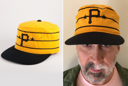

In [ ]:
image = Image.open(dest)
image.to_thumb(128, 128)

## Combine all of them

In [ ]:
data_path = "data_new"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for cap_type in cap_labels:

  dest = f"{data_path}/{cap_type}"              #in data_path folder create folders for each cap_type and the images for each cap_type will store there
  if not os.path.exists(dest):
    os.mkdir(dest)

  if len(os.listdir(dest)) == 0:

    try:
      cap_image_urls = search_images_ddg(cap_type)
      download_images(dest, urls = cap_image_urls)

    except:
      continue
  else:
        print(f"Images for {cap_type} already exist. Skipping download.")

Images for baseball cap already exist. Skipping download.
Images for beanie cap already exist. Skipping download.
Images for fedora cap already exist. Skipping download.
Images for cowboy hat already exist. Skipping download.
Images for kepi cap already exist. Skipping download.
Images for flat cap already exist. Skipping download.


In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#3712) [Path('data_new/visor cap/46842d0c-ca7d-4cb8-83cb-34e70ffbbd57.jpg'),Path('data_new/visor cap/e8e4fa5f-98d5-43e3-b06b-110296c8af48.jpg'),Path('data_new/visor cap/474a8abd-93f0-41ca-bc9e-6f910d9f255b.png'),Path('data_new/visor cap/2a893358-324a-4772-bdfd-079cc5949397.jpeg'),Path('data_new/visor cap/cabc0f25-ec60-42b7-be6d-b1330df489fb.jpg'),Path('data_new/visor cap/799a432f-81d8-4a8d-9fb8-d2715c0fd2fb.jpg'),Path('data_new/visor cap/f9d522ef-c5ad-4f9c-90f3-520d2baf827d.jpg'),Path('data_new/visor cap/3f296507-0309-4e70-b23a-5f30ad10f5a0.jpg'),Path('data_new/visor cap/59fbbd66-c55a-48dd-b126-d99ae6c27c26.jpg'),Path('data_new/visor cap/5889f5c4-aa3a-41d8-88dc-6ac13f1d2fba.jpg'),Path('data_new/visor cap/1a4e4049-bc9d-4ed9-8fd5-24b2b7fb4302.jpg'),Path('data_new/visor cap/ddc87296-1ff0-4b61-a1a1-26f14d3c1c38.jpeg'),Path('data_new/visor cap/bd144255-8bd4-4ef0-92c1-23b36cc8fdb9.jpg'),Path('data_new/visor cap/1caafdd0-146f-4496-8046-9e7301820026.jpeg'),Path('data_new/visor cap/587cb66e-c9

In [ ]:
failed = verify_images(image_counts)       #check how many fail images there
failed

(#506) [Path('data_new/visor cap/799a432f-81d8-4a8d-9fb8-d2715c0fd2fb.jpg'),Path('data_new/visor cap/3f296507-0309-4e70-b23a-5f30ad10f5a0.jpg'),Path('data_new/visor cap/bd144255-8bd4-4ef0-92c1-23b36cc8fdb9.jpg'),Path('data_new/visor cap/587cb66e-c928-4108-9f29-5de23c5fb8cf.jpg'),Path('data_new/visor cap/bda4e63e-1b08-4a99-a7a0-010a663db02d.jpg'),Path('data_new/visor cap/e3d9a473-e57c-44b7-ae80-377ae7052bc4.jpg'),Path('data_new/visor cap/9c340735-9548-4f40-a258-79683267b44a.jpg'),Path('data_new/visor cap/71f067ca-ffd6-4ebc-80a4-9eb45988d2a8.jpg'),Path('data_new/visor cap/713d14fe-93ff-4928-b1f3-fd1ff663c2b1.jpg'),Path('data_new/visor cap/9331b1c5-e736-4e9a-af6f-c672dc297a47.jpg'),Path('data_new/visor cap/6db50fa2-56e6-41e1-a3b1-e340cfefc698.jpg'),Path('data_new/visor cap/cb929d28-1cd3-423e-b796-36061031aaf2.jpg'),Path('data_new/visor cap/69b23377-60e4-4bbb-b1b5-cebac8d5d967.jpg'),Path('data_new/visor cap/74a324b9-232a-4788-8adf-cf27371fcbe6.jpg'),Path('data_new/visor cap/69f03e7c-3959-4

In [ ]:
failed.map(Path.unlink)                    #remove all the fail images

(#506) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

# From Data to Data Loaders

In [ ]:
doc(get_image_files)

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [ ]:
#for more info about datablocks
doc(DataBlock)

,Type,Default,Details,
blocks,list,None,One or more `TransformBlock`s,
dl_type,TfmdDL,None,"Task specific `TfmdDL`, defaults to `block`'s dl_type or`TfmdDL`",
getters,list,None,Getter functions applied to results of `get_items`,
n_inp,int,None,Number of inputs,
item_tfms,list,None,"`ItemTransform`s, applied on an item",
batch_tfms,list,None,"`Transform`s or `RandTransform`s, applied by batch",
get_items,NoneType,None,,
splitter,NoneType,None,,
get_y,NoneType,None,,
get_x,NoneType,None,,


In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

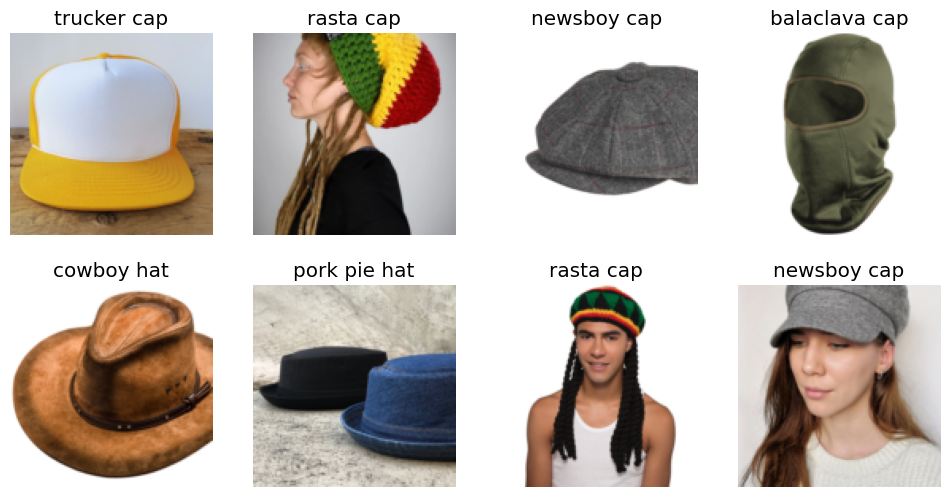

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

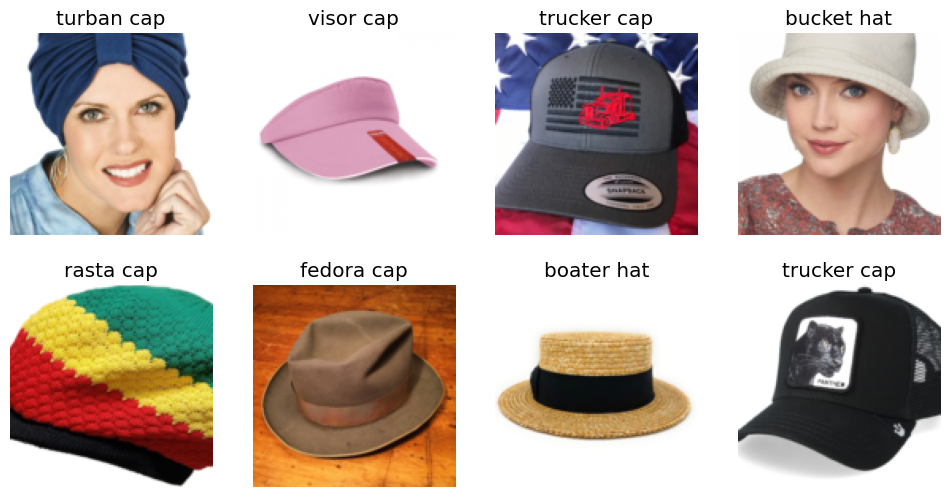

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation
Increasing data or creating synthetic data

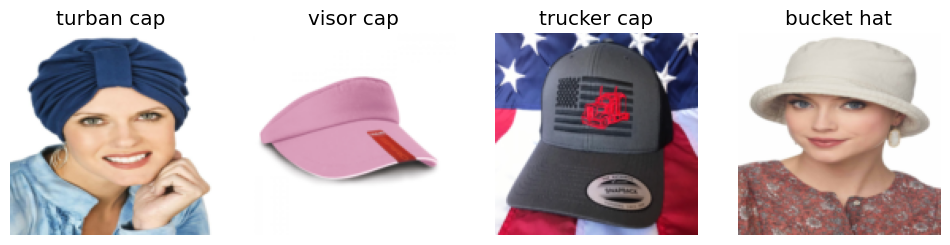

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size. 'new' is used for data augmentation
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

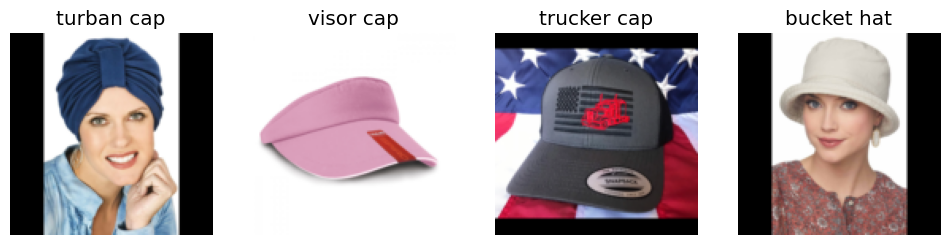

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

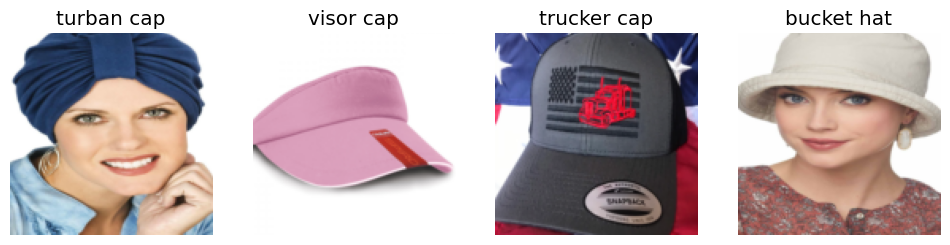

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
doc(aug_transforms)

,Type,Default,Details,
mult,float,1.0,"Multiplication applying to `max_rotate`,`max_lighting`,`max_warp`",
do_flip,bool,True,Random flipping,
flip_vert,bool,False,Flip vertically,
max_rotate,float,10.0,Maximum degree of rotation,
min_zoom,float,1.0,Minimum zoom,
max_zoom,float,1.1,Maximum zoom,
max_lighting,float,0.2,Maximum scale of changing brightness,
max_warp,float,0.2,Maximum value of changing warp per,
p_affine,float,0.75,Probability of applying affine transformation,
p_lighting,float,0.75,Probability of changing brightnest and contrast,


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


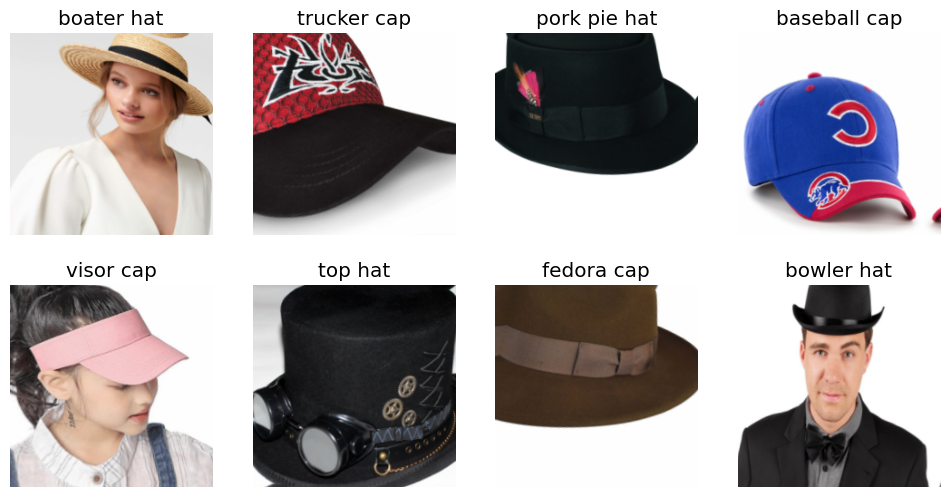

In [ ]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "lec_1_cap_dataloader_v0.pkl")